# Monte Carlo Simulation for FE
## IEOR 4703

### Metropolis-Hastings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

In [2]:
#=====================================
# play with this hyper-parameter
# try various different values for assessment
# 0.01, 0.1, 0.5, 1.0
eta = 0.01

# correlation
rho = 0.99

#-------------------------------------

mu1 = 2
mu2 = 5
mu = np.array([mu1, mu2])

sig1 = 1.2
sig2 = 1.1

# covariance matrix
Rho = np.array([[1.0, rho], [rho, 1.0]])
#sigma = np.eye(2)
sigma = np.array([[sig1, 0], [0, sig2]])
Sigma = np.dot(sigma, np.dot(Rho, sigma))


# theta_0
# be mindful of division by zero

theta_0 = np.array([5, 5])

# number of iterations
n_iters = 200000
theta_array = np.zeros([n_iters + 1, 2])


# keep track of acceptance and rejection
indicators = np.zeros(n_iters + 1)
#indicators[0] = 1 # special value

theta_array[0] = theta_0

# multivariate normal
mvn = multivariate_normal(mu, Sigma)

for i in range(1, n_iters + 1):

    thetaP = theta_array[i - 1] + eta * np.random.randn(2)

    # Metropolis Ratio
    q = np.minimum(1.0, mvn.pdf(thetaP) / mvn.pdf(theta_array[i - 1]))
    if np.random.rand() < q:
        # accept
        theta_array[i] = thetaP
        indicators[i] = 1
    else:
        # reject
        theta_array[i] = theta_array[i - 1]


### Fraction of accepted proposals

In [3]:
np.mean(indicators)

np.float64(0.9703151484242579)

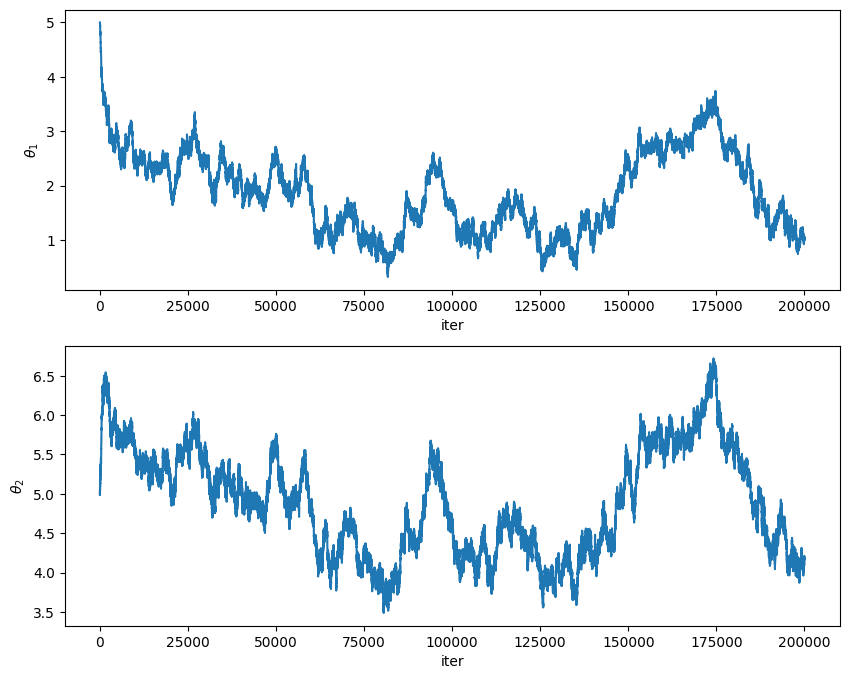

In [4]:
plt.figure(figsize=[10,8])
plt.subplot(2, 1, 1)
plt.plot(theta_array[:, 0])
plt.xlabel('iter')
plt.ylabel(r'$\theta_1$')
plt.subplot(2, 1, 2)
plt.plot(theta_array[:, 1])
plt.xlabel('iter')
plt.ylabel(r'$\theta_2$')
plt.show()

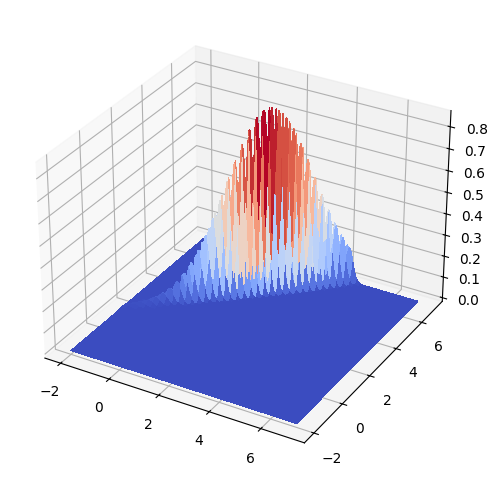

In [5]:
xx = np.linspace(-2, 7, 1000)
X, Y = np.meshgrid(xx, xx)
pos = np.empty(X.shape + (2,))
pos[:,:,0] = X; pos[:,:,1] = Y
P = mvn.pdf(pos)

fig = plt.figure(figsize=(6,6))
#ax = fig.gca(projection='3d')
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, P, cmap=cm.coolwarm, linewidth=0, antialiased=False)


### Distribution plot

/tmp/ipython-input-1824655054.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(theta_array[:, 0], hist=False)
/tmp/ipython-input-1824655054.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(theta_array[:, 1], hist=False)


<Axes: ylabel='Density'>

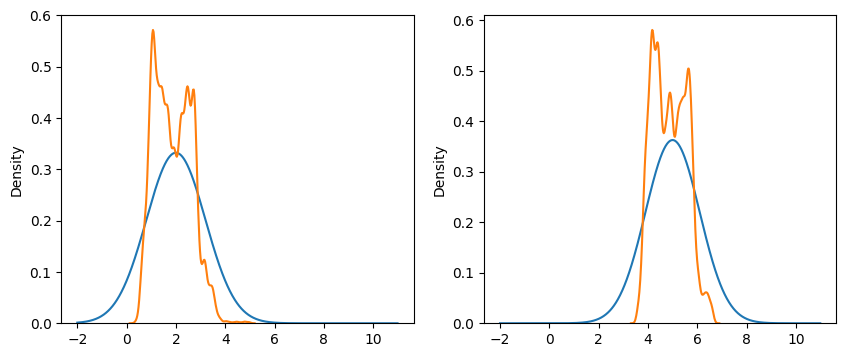

In [7]:
fig = plt.figure(figsize=(10,4))
x=np.arange(-2,11,0.01)

ax1 = fig.add_subplot(121)
y=norm.pdf(x, mu1, sig1)
ax1.plot(x,y)
sns.distplot(theta_array[:, 0], hist=False)

ax2 = fig.add_subplot(122)
y=norm.pdf(x, mu2, sig2)
ax2.plot(x,y)
sns.distplot(theta_array[:, 1], hist=False)

### Running sum to assess convergence

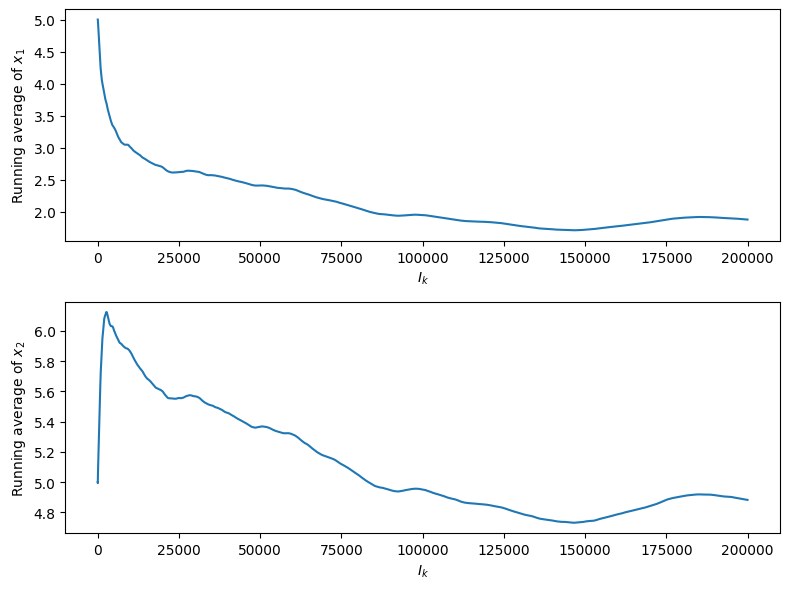

In [8]:
x1RunningAvg = np.cumsum(theta_array[:, 0]) / np.arange(1, n_iters+2)
x2RunningAvg = np.cumsum(theta_array[:, 1]) / np.arange(1, n_iters+2)

plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.plot(x1RunningAvg)
plt.xlabel('$I_k$')
plt.ylabel('Running average of $x_1$')
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(x2RunningAvg)
plt.xlabel('$I_k$')
plt.ylabel('Running average of $x_2$')
plt.tight_layout()

plt.show()

/tmp/ipython-input-2711155639.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(theta_array[b:, 0], hist=False)
/tmp/ipython-input-2711155639.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(theta_array[b:, 1], hist=False)


<Axes: ylabel='Density'>

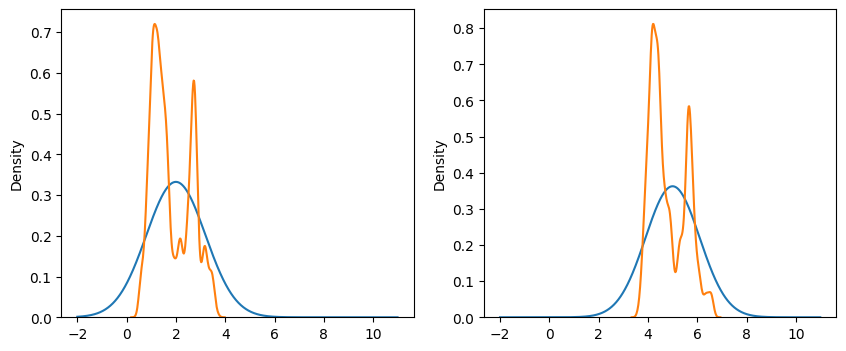

In [9]:
b = 100000

fig = plt.figure(figsize=(10,4))
x=np.arange(-2,11,0.01)

ax1 = fig.add_subplot(121)
y=norm.pdf(x, mu1, sig1)
ax1.plot(x,y)
sns.distplot(theta_array[b:, 0], hist=False)

ax2 = fig.add_subplot(122)
y=norm.pdf(x, mu2, sig2)
ax2.plot(x,y)
sns.distplot(theta_array[b:, 1], hist=False)


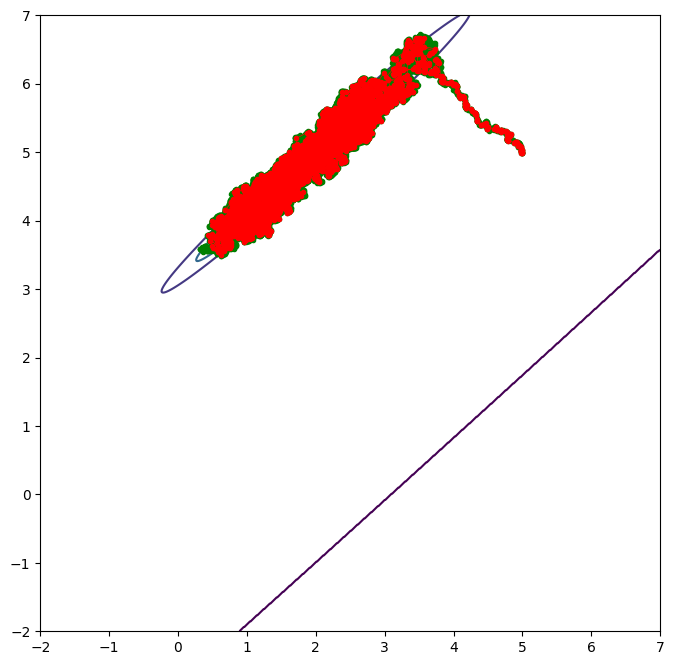

In [11]:
thetaAccepted = theta_array[indicators == 1]
thetaRejected = theta_array[indicators == 0]

plt.figure(figsize=(8,8))
plt.contour(X, Y, P)
plt.plot(thetaAccepted[:,0], thetaAccepted[:,1], 'g.-')
plt.plot(thetaRejected[:,0], thetaRejected[:,1], 'r.-', linewidth=0.5)
plt.show()